In [36]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
%matplotlib inline

In [37]:
global G
pi=math.pi
G=4*(pi)**2
Sunmass=1
AU=1.496e11
num_bodies=3

M1 = Sunmass
M2 = Sunmass
M3 = 0

r10= [0, 25, 0]
r20= [0, -25, 0]
r30= [2000*np.cos(0.226893), 0, 2000*np.sin(0.226893)]

v10= np.sqrt(M2**2/(50*(M1+M2)))*np.asarray([1,0,0])
v20= np.sqrt(M1**2/(50*(M1+M2)))*np.asarray([-1,0,0])
v30= np.sqrt(2*G*(M1+M2)*(1/(2000)-1/(2030)))*np.asarray([0,-1,0])


# global G
# G=6.67408e-11
# Sunmass=1.989e30
# AU=1.496e11
# num_bodies=3

# M1 = Sunmass
# M2 = Sunmass
# M3 = 0

# r10= [0, 25*AU, 0]
# r20= [0, -25*AU, 0]
# r30= [2000*AU*np.cos(0.226893), 0, 2000*AU*np.sin(0.226893)]

# v10= np.sqrt(M2**2/(50*AU*(M1+M2)))*np.asarray([1,0,0])
# v20= np.sqrt(M1**2/(50*AU*(M1+M2)))*np.asarray([-1,0,0])
# v30= np.sqrt(2*G*(M1+M2)*(1/(2000*AU)-1/(2030*AU)))*np.asarray([0,-1,0])

In [41]:
def drdt(v):
    return v

def dvdt(ri, rj, Mj):
    ##calculate magnitude of acceleration
    rr= np.sqrt(sum((ri-rj)**2))
    amag=G*Mj/(rr**2)
    ##calculate direction
    adir= (ri-rj)/rr
    
    return amag*np.asarray(adir)

In [42]:
#Set initial conditions and integration steps

N=1000 #number of steps in integration
t1=0.0
t2=10*365*24*60*60
t=np.linspace(t1,t2,N)
h=(t2-t1)/N

r1=np.zeros((N,3))
r2=np.zeros((N,3))
r3=np.zeros((N,3))

r=[r1,r2,r3]

v1=np.zeros((N,3))
v2=np.zeros((N,3))
v3=np.zeros((N,3))

v=[v1,v2,v3]

a1=np.zeros((N,3))
a2=np.zeros((N,3))
a3=np.zeros((N,3))

a=[a1,a2,a3]

M=[M1,M2,M3]

r1[0]=r10
r2[0]=r20
r3[0]=r30

v1[0]=v10
v2[0]=v20
v3[0]=v30


In [43]:
#Integration with RK4


for s in range(1,N):         #for each time step and skipping initial condition
    print("s=",s)
    for i in range(num_bodies):    #for the body i
        print("i=",i)
        ri=r[i][s-1]
        vi=v[i][s-1]
        print("ri=",ri)
        
        delta_ri=np.zeros(3)
        delta_vi=np.zeros(3)
        for j in range(num_bodies):   #calculate the force on body i due to body j
            if i==j:
                continue
            print("j=",j)
            rj=r[j][s-1]
            vj=v[j][s-1]
            Mj=M[j]
            print("rj=",rj)
            print("Mj=",Mj)
            
            k1r=h*drdt(vi)
            k1v=h*dvdt(ri,rj,Mj)
    
            k2r=h*drdt(vi+k1v/2)
            k2v=h*dvdt(ri+k1r/2,rj,Mj)
            
            k3r=h*drdt(vi+k2v/2)
            k3v=h*dvdt(ri+k2r/2,rj,Mj)
        
            k4r=h*drdt(vi+k3v)
            k4v=h*dvdt(ri+k3r,rj,Mj)
            print("k4r=",k4r)
            
            delta_ri = delta_ri +1.0/6.0*(k1r + 2*k2r  + 2*k3r + k4r)
            delta_vi = delta_vi +1.0/6.0*(k1v + 2*k2v  + 2*k3v + k4v)
            print("delta_vi=",delta_vi)
            
            
        r[i][s]=ri+delta_ri
        v[i][s]=vi+delta_vi

        
        a[i][s]=delta_vi/h
    
    

s= 1
i= 0
ri= [ 0. 25.  0.]
j= 1
rj= [  0. -25.   0.]
Mj= 1
k4r= [3.15360000e+04 2.54698823e-05 0.00000000e+00]
delta_vi= [1.80256326e-02 8.29994307e+02 0.00000000e+00]
j= 2
rj= [1948.74004083    0.          449.90249306]
Mj= 0
k4r= [31536.     0.     0.]
delta_vi= [1.80256326e-02 8.29994307e+02 0.00000000e+00]
i= 1
ri= [  0. -25.   0.]
j= 0
rj= [ 0. 25.  0.]
Mj= 1
k4r= [-3.15360000e+04 -2.54698823e-05  0.00000000e+00]
delta_vi= [-1.80256326e-02 -8.29994307e+02  0.00000000e+00]
j= 2
rj= [1948.74004083    0.          449.90249306]
Mj= 0
k4r= [-31536.      0.      0.]
delta_vi= [-1.80256326e-02 -8.29994307e+02  0.00000000e+00]
i= 2
ri= [1948.74004083    0.          449.90249306]
j= 0
rj= [ 0. 25.  0.]
Mj= 1
k4r= [    62.42768945 -10774.63609091     14.41258071]
delta_vi= [ 0.54765277 -0.12384872  0.12643572]
j= 1
rj= [  0. -25.   0.]
Mj= 1
k4r= [    62.52967205 -10773.03531701     14.43612527]
delta_vi= [ 1.09634702 -0.23650969  0.25311188]
s= 2
i= 0
ri= [6.57038548e+04 2.61747021e+08 0.

k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.48235861e-17 -1.00620193e-13  0.00000000e+00]
i= 2
ri= [ 7249020.62518344 -1765875.08781116  1673569.78517887]
j= 0
rj= [8.10115125e+05 5.49668711e+09 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613375  79821.36266745]
delta_vi= [ 4.95167142e-16 -4.11791676e-13  1.28325438e-16]
j= 1
rj= [-8.10115125e+05 -5.49668711e+09  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613349  79821.36266745]
delta_vi= [1.11289383e-15 5.41823926e-16 2.56904353e-16]
s= 13
i= 0
ri= [8.84556252e+05 6.02018112e+09 0.00000000e+00]
j= 1
rj= [-8.84556252e+05 -6.02018112e+09  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.23456597e-17 8.40518352e-14 0.00000000e+00]
j= 2
rj= [ 7940508.61622021 -1936591.36007841  1833212.51051377]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.23456597e-17 8.40518352e-14 0.00000000e+00]
i= 1
ri= [-8.84556252e+05 -6.02018112e+09  0.00000

rj= [1.62896752e+06 1.12551212e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613365  79821.36266745]
delta_vi= [ 1.16888026e-16 -9.82156194e-14  3.02664404e-17]
j= 1
rj= [-1.62896752e+06 -1.12551212e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613359  79821.36266745]
delta_vi= [2.62482161e-16 1.28645694e-16 6.05923864e-17]
s= 24
i= 0
ri= [1.70340865e+06 1.17786152e+10 0.00000000e+00]
j= 1
rj= [-1.70340865e+06 -1.17786152e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.20851221e-18 2.21880424e-14 0.00000000e+00]
j= 2
rj= [15546876.51762475 -3814470.35501807  3589282.48919767]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.20851221e-18 2.21880424e-14 0.00000000e+00]
i= 1
ri= [-1.70340865e+06 -1.17786152e+10  0.00000000e+00]
j= 0
rj= [1.70340865e+06 1.17786152e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.20851221e-18 -2.21880424e-14  0.00000000e+00]

delta_vi= [-1.99741477e-18 -1.38611798e-14  0.00000000e+00]
j= 2
rj= [19695804.46384541 -4838767.98862151  4547138.84120707]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.99741477e-18 -1.38611798e-14  0.00000000e+00]
i= 2
ri= [19695804.46384541 -4838767.98862151  4547138.84120707]
j= 0
rj= [2.15005541e+06 1.49195793e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613364  79821.36266745]
delta_vi= [ 6.63589230e-17 -5.58943704e-14  1.71791962e-17]
j= 1
rj= [-2.15005541e+06 -1.49195793e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.1361336   79821.36266745]
delta_vi= [1.48984365e-16 7.31342043e-17 3.43921310e-17]
s= 31
i= 0
ri= [2.22449654e+06 1.54430733e+10 0.00000000e+00]
j= 1
rj= [-2.22449654e+06 -1.54430733e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.86401136e-18 1.29411812e-14 0.00000000e+00]
j= 2
rj= [20387292.45488218 -5009484.26088875  4706781.56654197]
Mj= 0
k4r= [3.72205635e+04 2.61747

Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.28623236e-18 8.94908239e-15 0.00000000e+00]
i= 1
ri= [-2.67114330e+06 -1.85840374e+10  0.00000000e+00]
j= 0
rj= [2.67114330e+06 1.85840374e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.28623236e-18 -8.94908239e-15  0.00000000e+00]
j= 2
rj= [24536220.40110286 -6033781.8944922   5664637.91855137]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.28623236e-18 -8.94908239e-15  0.00000000e+00]
i= 2
ri= [24536220.40110286 -6033781.8944922   5664637.91855137]
j= 0
rj= [2.67114330e+06 1.85840374e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613363  79821.36266745]
delta_vi= [ 4.27061468e-17 -3.60247744e-14  1.10545355e-17]
j= 1
rj= [-2.67114330e+06 -1.85840374e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613361  79821.36266745]
delta_vi= [9.58689562e-17 4.71057108e-17 2.21307670e-17]
s= 38
i= 0
ri= [2.74558443e+06 1.91075314e+1

i= 0
ri= [3.19223119e+06 2.22484954e+10 0.00000000e+00]
j= 1
rj= [-3.19223119e+06 -2.22484954e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [8.96892135e-19 6.25112030e-15 0.00000000e+00]
j= 2
rj= [29376636.33836032 -7228795.80036288  6782136.99589567]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [8.96892135e-19 6.25112030e-15 0.00000000e+00]
i= 1
ri= [-3.19223119e+06 -2.22484954e+10  0.00000000e+00]
j= 0
rj= [3.19223119e+06 2.22484954e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-8.96892135e-19 -6.25112030e-15  0.00000000e+00]
j= 2
rj= [29376636.33836032 -7228795.80036288  6782136.99589567]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-8.96892135e-19 -6.25112030e-15  0.00000000e+00]
i= 2
ri= [29376636.33836032 -7228795.80036288  6782136.99589567]
j= 0
rj= [3.19223119e+06 2.22484954e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613363  79

rj= [3.63887795e+06 2.53894595e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613363  79821.36266745]
delta_vi= [ 2.28434639e-17 -1.93007730e-14  5.91226110e-18]
j= 1
rj= [-3.63887795e+06 -2.53894595e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613361  79821.36266745]
delta_vi= [5.12732349e-17 2.52197641e-17 1.18361175e-17]
s= 51
i= 0
ri= [3.71331908e+06 2.59129535e+10 0.00000000e+00]
j= 1
rj= [-3.71331908e+06 -2.59129535e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.60878472e-19 4.61195034e-15 0.00000000e+00]
j= 2
rj= [34217052.27561778 -8423809.70623356  7899636.07323998]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.60878472e-19 4.61195034e-15 0.00000000e+00]
i= 1
ri= [-3.71331908e+06 -2.59129535e+10  0.00000000e+00]
j= 0
rj= [3.71331908e+06 2.59129535e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-6.60878472e-19 -4.61195034e-15  0.00000000e+00]

delta_vi= [-5.25561385e-19 -3.67066754e-15  0.00000000e+00]
j= 2
rj= [38365980.22183846 -9448107.33983701  8857492.42524938]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.25561385e-19 -3.67066754e-15  0.00000000e+00]
i= 2
ri= [38365980.22183846 -9448107.33983701  8857492.42524938]
j= 0
rj= [4.15996584e+06 2.90539175e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.74348230e-17 -1.47391447e-14  4.51220689e-18]
j= 1
rj= [-4.15996584e+06 -2.90539175e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.91314540e-17 1.92545409e-17 9.03326113e-18]
s= 58
i= 0
ri= [4.23440697e+06 2.95774115e+10 0.00000000e+00]
j= 1
rj= [-4.23440697e+06 -2.95774115e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.07101142e-19 3.54216341e-15 0.00000000e+00]
j= 2
rj= [39057468.21287524 -9618823.61210425  9017135.15058428]
Mj= 0
k4r= [3.72205635e+04 2.61747

Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.14319894e-19 2.89593733e-15 0.00000000e+00]
i= 1
ri= [-4.68105373e+06 -3.27183756e+10  0.00000000e+00]
j= 0
rj= [4.68105373e+06 3.27183756e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.14319894e-19 -2.89593733e-15  0.00000000e+00]
j= 2
rj= [ 43206396.15909592 -10643121.24570769   9974991.50259369]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.14319894e-19 -2.89593733e-15  0.00000000e+00]
i= 2
ri= [ 43206396.15909592 -10643121.24570769   9974991.50259369]
j= 0
rj= [4.68105373e+06 3.27183756e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.37421803e-17 -1.16224656e-14  3.55640677e-18]
j= 1
rj= [-4.68105373e+06 -3.27183756e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.08424100e-17 1.51801939e-17 7.11978547e-18]
s= 65
i= 0
ri= [4.75549485e+06 3.32418

rj= [ 50121276.06946372 -12350283.9683801   11571418.75594271]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.07818861e-19 -2.15333650e-15  0.00000000e+00]
i= 2
ri= [ 50121276.06946372 -12350283.9683801   11571418.75594271]
j= 0
rj= [5.42546500e+06 3.79533157e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.02078472e-17 -8.63738646e-15  2.64163485e-18]
j= 1
rj= [-5.42546500e+06 -3.79533157e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.29091803e-17 1.12790335e-17 5.28844725e-18]
s= 75
i= 0
ri= [5.49990612e+06 3.84768097e+10 0.00000000e+00]
j= 1
rj= [-5.49990612e+06 -3.84768097e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.99492500e-19 2.09523887e-15 0.00000000e+00]
j= 2
rj= [ 50812764.0605005  -12521000.24064735  11731061.48127761]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.99492500e-19 2.0952

delta_vi= [-2.37666908e-19 -1.66364613e-15  0.00000000e+00]
j= 2
rj= [ 57036155.97983152 -14057446.69105252  13167846.00929172]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.37666908e-19 -1.66364613e-15  0.00000000e+00]
i= 2
ri= [ 57036155.97983152 -14057446.69105252  13167846.00929172]
j= 0
rj= [6.16987627e+06 4.31882558e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 7.88036853e-18 -6.67037903e-15  2.03925784e-18]
j= 1
rj= [-6.16987627e+06 -4.31882558e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.76851529e-17 8.70907886e-18 4.08251195e-18]
s= 85
i= 0
ri= [6.24431739e+06 4.37117498e+10 0.00000000e+00]
j= 1
rj= [-6.24431739e+06 -4.37117498e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.32003981e-19 1.62409569e-15 0.00000000e+00]
j= 2
rj= [ 57727643.9708683  -14228162.96331976  13327488.73462662]
Mj= 0
k4r= [3.72205635e+0

rj= [6.98872866e+06 4.89466899e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.13335799e-18 -5.19320213e-15  1.58713117e-18]
j= 1
rj= [-6.98872866e+06 -4.89466899e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.37641509e-17 6.77952205e-18 3.17737217e-18]
s= 96
i= 0
ri= [7.06316979e+06 4.94701839e+10 0.00000000e+00]
j= 1
rj= [-7.06316979e+06 -4.94701839e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.81103019e-19 1.26844570e-15 0.00000000e+00]
j= 2
rj= [ 65334011.87227289 -16106041.95825941  15083558.71331054]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.81103019e-19 1.26844570e-15 0.00000000e+00]
i= 1
ri= [-7.06316979e+06 -4.94701839e+10  0.00000000e+00]
j= 0
rj= [7.06316979e+06 4.94701839e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.81103019e-19 -1.26844570e-15  0.00000000e+

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 5.10253827e-18 -4.32126344e-15  1.32036334e-18]
j= 1
rj= [-7.65869881e+06 -5.36581360e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.14506467e-17 5.64074526e-18 2.64331359e-18]
s= 105
i= 0
ri= [7.73313993e+06 5.41816300e+10 0.00000000e+00]
j= 1
rj= [-7.73313993e+06 -5.41816300e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.50958067e-19 1.05768039e-15 0.00000000e+00]
j= 2
rj= [ 71557403.79160386 -17642488.40866458  16520343.24132465]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.50958067e-19 1.05768039e-15 0.00000000e+00]
i= 1
ri= [-7.73313993e+06 -5.41816300e+10  0.00000000e+00]
j= 0
rj= [7.73313993e+06 5.41816300e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.50958067e-19 -1.05768039e-15  0.00000000e+00]
j= 2
rj= [ 71557403.79160386 -17642488.4086645

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 4.08815827e-18 -3.46296042e-15  1.05785689e-18]
j= 1
rj= [-8.55199233e+06 -5.99400641e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [9.17409904e-18 4.51993072e-18 2.11778617e-18]
s= 117
i= 0
ri= [8.62643346e+06 6.04635581e+10 0.00000000e+00]
j= 1
rj= [-8.62643346e+06 -6.04635581e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.21203720e-19 8.49532352e-16 0.00000000e+00]
j= 2
rj= [ 79855259.68404514 -19691083.67587147  18436055.94534346]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.21203720e-19 8.49532352e-16 0.00000000e+00]
i= 1
ri= [-8.62643346e+06 -6.04635581e+10  0.00000000e+00]
j= 0
rj= [8.62643346e+06 6.04635581e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.21203720e-19 -8.49532352e-16  0.00000000e+00]
j= 2
rj= [ 79855259.68404514 -19691083.6758714

i= 0
ri= [9.22196247e+06 6.46515102e+10 0.00000000e+00]
j= 1
rj= [-9.22196247e+06 -6.46515102e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.06002001e-19 7.43140176e-16 0.00000000e+00]
j= 2
rj= [ 85387163.61233932 -21056813.8540094   19713197.74802268]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.06002001e-19 7.43140176e-16 0.00000000e+00]
i= 1
ri= [-9.22196247e+06 -6.46515102e+10  0.00000000e+00]
j= 0
rj= [9.22196247e+06 6.46515102e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.06002001e-19 -7.43140176e-16  0.00000000e+00]
j= 2
rj= [ 85387163.61233932 -21056813.8540094   19713197.74802268]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.06002001e-19 -7.43140176e-16  0.00000000e+00]
i= 2
ri= [ 85387163.61233932 -21056813.8540094   19713197.74802268]
j= 0
rj= [9.22196247e+06 6.46515102e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.136

rj= [1.00408149e+07 7.04099443e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-8.93646306e-20 -6.26659818e-16  0.00000000e+00]
j= 2
rj= [ 92993531.51374382 -22934692.84894905  21469267.72670659]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-8.93646306e-20 -6.26659818e-16  0.00000000e+00]
i= 2
ri= [ 92993531.51374382 -22934692.84894905  21469267.72670659]
j= 0
rj= [1.00408149e+07 7.04099443e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.96191777e-18 -2.50965468e-15  7.66411628e-19]
j= 1
rj= [-1.00408149e+07 -7.04099443e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [6.64658441e-18 3.27525794e-18 1.53432451e-18]
s= 137
i= 0
ri= [1.01152560e+07 7.09334383e+10 0.00000000e+00]
j= 1
rj= [-1.01152560e+07 -7.09334383e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [8.80498284e-20 6.17452812e

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [7.85018393e-20 5.50583449e-16 0.00000000e+00]
i= 1
ri= [-1.07107850e+07 -7.51213904e+10  0.00000000e+00]
j= 0
rj= [1.07107850e+07 7.51213904e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-7.85018393e-20 -5.50583449e-16  0.00000000e+00]
j= 2
rj= [ 99216923.43307477 -24471139.29935422  22906052.2547207 ]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-7.85018393e-20 -5.50583449e-16  0.00000000e+00]
i= 2
ri= [ 99216923.43307477 -24471139.29935422  22906052.2547207 ]
j= 0
rj= [1.07107850e+07 7.51213904e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.60177820e-18 -2.20472663e-15  6.73218001e-19]
j= 1
rj= [-1.07107850e+07 -7.51213904e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [5.83837700e-18 2.87718217e-18 1.34775465e-18]
s= 146
i= 0
ri= [1.07852261e+07 7.56448844e+

ri= [1.12318729e+07 7.87858484e+10 0.00000000e+00]
j= 1
rj= [-1.12318729e+07 -7.87858484e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [7.13661284e-20 5.00597972e-16 0.00000000e+00]
j= 2
rj= [ 1.04057339e+08 -2.56661532e+07  2.40235513e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [7.13661284e-20 5.00597972e-16 0.00000000e+00]
i= 1
ri= [-1.12318729e+07 -7.87858484e+10  0.00000000e+00]
j= 0
rj= [1.12318729e+07 7.87858484e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-7.13661284e-20 -5.00597972e-16  0.00000000e+00]
j= 2
rj= [ 1.04057339e+08 -2.56661532e+07  2.40235513e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-7.13661284e-20 -5.00597972e-16  0.00000000e+00]
i= 2
ri= [ 1.04057339e+08 -2.56661532e+07  2.40235513e+07]
j= 0
rj= [1.12318729e+07 7.87858484e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.18721457e-18 -1.85365916e-15  5.65942517e-19]
j= 1
rj= [-1.16785197e+07 -8.19268125e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [4.90804694e-18 2.41890603e-18 1.13299350e-18]
s= 159
i= 0
ri= [1.17529608e+07 8.24503065e+10 0.00000000e+00]
j= 1
rj= [-1.17529608e+07 -8.24503065e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.51609128e-20 4.57122902e-16 0.00000000e+00]
j= 2
rj= [ 1.08897755e+08 -2.68611671e+07  2.51410504e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.51609128e-20 4.57122902e-16 0.00000000e+00]
i= 1
ri= [-1.17529608e+07 -8.24503065e+10  0.00000000e+00]
j= 0
rj= [1.17529608e+07 8.24503065e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-6.51609128e-20 -4.57122902e-16  0.00000000e+00]
j= 2
rj= [ 1.08897755e+08 -2.68611671e+07  2.51410504e+

j= 2
rj= [ 1.13046683e+08 -2.78854647e+07  2.60989068e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-6.04643591e-20 -4.24212871e-16  0.00000000e+00]
i= 2
ri= [ 1.13046683e+08 -2.78854647e+07  2.60989068e+07]
j= 0
rj= [1.21996076e+07 8.55912706e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.00382153e-18 -1.69833382e-15  5.18486955e-19]
j= 1
rj= [-1.21996076e+07 -8.55912706e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [4.49649595e-18 2.21615978e-18 1.03798940e-18]
s= 166
i= 0
ri= [1.22740487e+07 8.61147646e+10 0.00000000e+00]
j= 1
rj= [-1.22740487e+07 -8.61147646e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.97311724e-20 4.19074833e-16 0.00000000e+00]
j= 2
rj= [ 1.13738171e+08 -2.80561810e+07  2.62585495e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.97311724e-20 4.19074833e-16 0.00000000e+

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.55996239e-20 3.90119636e-16 0.00000000e+00]
i= 1
ri= [-1.27206954e+07 -8.92557286e+10  0.00000000e+00]
j= 0
rj= [1.27206954e+07 8.92557286e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.55996239e-20 -3.90119636e-16  0.00000000e+00]
j= 2
rj= [ 1.17887099e+08 -2.90804787e+07  2.72164058e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.55996239e-20 -3.90119636e-16  0.00000000e+00]
i= 2
ri= [ 1.17887099e+08 -2.90804787e+07  2.72164058e+07]
j= 0
rj= [1.27206954e+07 8.92557286e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.84256305e-18 -1.56174388e-15  4.76759322e-19]
j= 1
rj= [-1.27206954e+07 -8.92557286e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [4.13461954e-18 2.03787541e-18 9.54452385e-19]
s= 173
i= 0
ri= [1.27951366e+07 8.97792226e+10 0.00000000e+00]

ri= [1.32417833e+07 9.29201867e+10 0.00000000e+00]
j= 1
rj= [-1.32417833e+07 -9.29201867e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.12992111e-20 3.59977155e-16 0.00000000e+00]
j= 2
rj= [ 1.22727515e+08 -3.02754926e+07  2.83339049e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.12992111e-20 3.59977155e-16 0.00000000e+00]
i= 1
ri= [-1.32417833e+07 -9.29201867e+10  0.00000000e+00]
j= 0
rj= [1.32417833e+07 9.29201867e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.12992111e-20 -3.59977155e-16  0.00000000e+00]
j= 2
rj= [ 1.22727515e+08 -3.02754926e+07  2.83339049e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.12992111e-20 -3.59977155e-16  0.00000000e+00]
i= 2
ri= [ 1.22727515e+08 -3.02754926e+07  2.83339049e+07]
j= 0
rj= [1.32417833e+07 9.29201867e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.59059722e-18 -1.34829975e-15  4.11560617e-19]
j= 1
rj= [-1.36884301e+07 -9.60611507e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.56919395e-18 1.75928987e-18 8.23927251e-19]
s= 186
i= 0
ri= [1.37628712e+07 9.65846448e+10 0.00000000e+00]
j= 1
rj= [-1.37628712e+07 -9.65846448e+10  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.74790959e-20 3.33197772e-16 0.00000000e+00]
j= 2
rj= [ 1.27567931e+08 -3.14705065e+07  2.94514040e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.74790959e-20 3.33197772e-16 0.00000000e+00]
i= 1
ri= [-1.37628712e+07 -9.65846448e+10  0.00000000e+00]
j= 0
rj= [1.37628712e+07 9.65846448e+10 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.74790959e-20 -3.33197772e-16  0.00000000e+00]
j= 2
rj= [ 1.27567931e+08 -3.14705065e+07  2.94514040e+

j= 2
rj= [ 1.31716859e+08 -3.24948041e+07  3.04092603e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.4534385e-20 -3.1255279e-16  0.0000000e+00]
i= 2
ri= [ 1.31716859e+08 -3.24948041e+07  3.04092603e+07]
j= 0
rj= [1.42095180e+07 9.97256088e+10 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.47578710e-18 -1.25103262e-15  3.81852588e-19]
j= 1
rj= [-1.42095180e+07 -9.97256088e+10  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.31155571e-18 1.63234313e-18 7.64452997e-19]
s= 193
i= 0
ri= [1.42839591e+07 1.00249103e+11 0.00000000e+00]
j= 1
rj= [-1.42839591e+07 -1.00249103e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.40703292e-20 3.09299171e-16 0.00000000e+00]
j= 2
rj= [ 1.32408347e+08 -3.26655204e+07  3.05689031e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.40703292e-20 3.09299171e-16 0.00000000e+00]

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.14324464e-20 2.90803289e-16 0.00000000e+00]
i= 1
ri= [-1.47306059e+07 -1.03390067e+11  0.00000000e+00]
j= 0
rj= [1.47306059e+07 1.03390067e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.14324464e-20 -2.90803289e-16  0.00000000e+00]
j= 2
rj= [ 1.36557275e+08 -3.36898180e+07  3.15267594e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.14324464e-20 -2.90803289e-16  0.00000000e+00]
i= 2
ri= [ 1.36557275e+08 -3.36898180e+07  3.15267594e+07]
j= 0
rj= [1.47306059e+07 1.03390067e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.37297336e-18 -1.16392340e-15  3.55248853e-19]
j= 1
rj= [-1.47306059e+07 -1.03390067e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.08083899e-18 1.51865690e-18 7.11193413e-19]
s= 200
i= 0
ri= [1.48050470e+07 1.03913561e+11 0.00000000e+00]

ri= [1.52516938e+07 1.07054525e+11 0.00000000e+00]
j= 1
rj= [-1.52516938e+07 -1.07054525e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.86436586e-20 2.71247462e-16 0.00000000e+00]
j= 2
rj= [ 1.41397691e+08 -3.48848319e+07  3.26442585e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.86436586e-20 2.71247462e-16 0.00000000e+00]
i= 1
ri= [-1.52516938e+07 -1.07054525e+11  0.00000000e+00]
j= 0
rj= [1.52516938e+07 1.07054525e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.86436586e-20 -2.71247462e-16  0.00000000e+00]
j= 2
rj= [ 1.41397691e+08 -3.48848319e+07  3.26442585e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.86436586e-20 -2.71247462e-16  0.00000000e+00]
i= 2
ri= [ 1.41397691e+08 -3.48848319e+07  3.26442585e+07]
j= 0
rj= [1.52516938e+07 1.07054525e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.20854528e-18 -1.02460013e-15  3.12702289e-19]
j= 1
rj= [-1.56983405e+07 -1.10195489e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.71186061e-18 1.33683245e-18 6.26016947e-19]
s= 213
i= 0
ri= [1.57727816e+07 1.10718983e+11 0.00000000e+00]
j= 1
rj= [-1.57727816e+07 -1.10718983e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.61272460e-20 2.53599922e-16 0.00000000e+00]
j= 2
rj= [ 1.46238107e+08 -3.60798458e+07  3.37617576e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.61272460e-20 2.53599922e-16 0.00000000e+00]
i= 1
ri= [-1.57727816e+07 -1.10718983e+11  0.00000000e+00]
j= 0
rj= [1.57727816e+07 1.10718983e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.61272460e-20 -2.53599922e-16  0.00000000e+00]
j= 2
rj= [ 1.46238107e+08 -3.60798458e+07  3.37617576e+

j= 2
rj= [ 1.50387035e+08 -3.71041434e+07  3.47196139e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.41609242e-20 -2.39809002e-16  0.00000000e+00]
i= 2
ri= [ 1.50387035e+08 -3.71041434e+07  3.47196139e+07]
j= 0
rj= [1.62194284e+07 1.13859947e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.13196849e-18 -9.59710156e-16  2.92887796e-19]
j= 1
rj= [-1.62194284e+07 -1.13859947e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.54002254e-18 1.25215028e-18 5.86349148e-19]
s= 220
i= 0
ri= [1.62938695e+07 1.14383441e+11 0.00000000e+00]
j= 1
rj= [-1.62938695e+07 -1.14383441e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.38488600e-20 2.37620225e-16 0.00000000e+00]
j= 2
rj= [ 1.51078523e+08 -3.72748597e+07  3.48792567e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.38488600e-20 2.37620225e-16 0.00000000e+

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.20632275e-20 2.25095525e-16 0.00000000e+00]
i= 1
ri= [-1.67405163e+07 -1.17524405e+11  0.00000000e+00]
j= 0
rj= [1.67405163e+07 1.17524405e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.20632275e-20 -2.25095525e-16  0.00000000e+00]
j= 2
rj= [ 1.55227451e+08 -3.82991574e+07  3.58371130e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.20632275e-20 -2.25095525e-16  0.00000000e+00]
i= 2
ri= [ 1.55227451e+08 -3.82991574e+07  3.58371130e+07]
j= 0
rj= [1.67405163e+07 1.17524405e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.06244582e-18 -9.00794916e-16  2.74898651e-19]
j= 1
rj= [-1.67405163e+07 -1.17524405e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.38401452e-18 1.17526681e-18 5.50335624e-19]
s= 227
i= 0
ri= [1.68149574e+07 1.18047899e+11 0.00000000e+00]

ri= [1.72616042e+07 1.21188863e+11 0.00000000e+00]
j= 1
rj= [-1.72616042e+07 -1.21188863e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.01529789e-20 2.11695764e-16 0.00000000e+00]
j= 2
rj= [ 1.60067867e+08 -3.94941713e+07  3.69546121e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.01529789e-20 2.11695764e-16 0.00000000e+00]
i= 1
ri= [-1.72616042e+07 -1.21188863e+11  0.00000000e+00]
j= 0
rj= [1.72616042e+07 1.21188863e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.01529789e-20 -2.11695764e-16  0.00000000e+00]
j= 2
rj= [ 1.60067867e+08 -3.94941713e+07  3.69546121e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.01529789e-20 -2.11695764e-16  0.00000000e+00]
i= 2
ri= [ 1.60067867e+08 -3.94941713e+07  3.69546121e+07]
j= 0
rj= [1.72616042e+07 1.21188863e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 9.49269435e-19 -8.04880481e-16  2.45614165e-19]
j= 1
rj= [-1.77082510e+07 -1.24329827e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.13004945e-18 1.05010334e-18 4.91709295e-19]
s= 240
i= 0
ri= [1.77826921e+07 1.24853321e+11 0.00000000e+00]
j= 1
rj= [-1.77826921e+07 -1.24853321e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.84084924e-20 1.99457854e-16 0.00000000e+00]
j= 2
rj= [ 1.64908283e+08 -4.06891852e+07  3.80721112e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.84084924e-20 1.99457854e-16 0.00000000e+00]
i= 1
ri= [-1.77826921e+07 -1.24853321e+11  0.00000000e+00]
j= 0
rj= [1.77826921e+07 1.24853321e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.84084924e-20 -1.99457854e-16  0.00000000e+00]
j= 2
rj= [ 1.64908283e+08 -4.06891852e+07  3.80721112e+

j= 2
rj= [ 1.69057211e+08 -4.17134828e+07  3.90299675e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.70309515e-20 -1.89793503e-16  0.00000000e+00]
i= 2
ri= [ 1.69057211e+08 -4.17134828e+07  3.90299675e+07]
j= 0
rj= [1.82293388e+07 1.27994285e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 8.95669421e-19 -7.59452996e-16  2.31745184e-19]
j= 1
rj= [-1.82293388e+07 -1.27994285e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.00977291e-18 9.90824302e-19 4.63944170e-19]
s= 247
i= 0
ri= [1.83037800e+07 1.28517779e+11 0.00000000e+00]
j= 1
rj= [-1.83037800e+07 -1.28517779e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.68111297e-20 1.88251256e-16 0.00000000e+00]
j= 2
rj= [ 1.69748699e+08 -4.18841991e+07  3.91896102e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.68111297e-20 1.88251256e-16 0.00000000e+

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.55468031e-20 1.79380586e-16 0.00000000e+00]
i= 1
ri= [-1.87504267e+07 -1.31658743e+11  0.00000000e+00]
j= 0
rj= [1.87504267e+07 1.31658743e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.55468031e-20 -1.79380586e-16  0.00000000e+00]
j= 2
rj= [ 1.73897626e+08 -4.29084967e+07  4.01474666e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.55468031e-20 -1.79380586e-16  0.00000000e+00]
i= 2
ri= [ 1.73897626e+08 -4.29084967e+07  4.01474666e+07]
j= 0
rj= [1.87504267e+07 1.31658743e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 8.46484228e-19 -7.17765618e-16  2.19018577e-19]
j= 1
rj= [-1.87504267e+07 -1.31658743e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.89940342e-18 9.36426681e-19 4.38466028e-19]
s= 254
i= 0
ri= [1.88248679e+07 1.32182237e+11 0.00000000e+00]

ri= [1.92715146e+07 1.35323201e+11 0.00000000e+00]
j= 1
rj= [-1.92715146e+07 -1.35323201e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.41816135e-20 1.69801687e-16 0.00000000e+00]
j= 2
rj= [ 1.78738042e+08 -4.41035106e+07  4.12649657e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.41816135e-20 1.69801687e-16 0.00000000e+00]
i= 1
ri= [-1.92715146e+07 -1.35323201e+11  0.00000000e+00]
j= 0
rj= [1.92715146e+07 1.35323201e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.41816135e-20 -1.69801687e-16  0.00000000e+00]
j= 2
rj= [ 1.78738042e+08 -4.41035106e+07  4.12649657e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.41816135e-20 -1.69801687e-16  0.00000000e+00]
i= 2
ri= [ 1.78738042e+08 -4.41035106e+07  4.12649657e+07]
j= 0
rj= [1.92715146e+07 1.35323201e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 7.65288621e-19 -6.48944091e-16  1.98009401e-19]
j= 1
rj= [-1.97181614e+07 -1.38464166e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.71720468e-18 8.46623805e-19 3.96406531e-19]
s= 267
i= 0
ri= [1.97926025e+07 1.38987660e+11 0.00000000e+00]
j= 1
rj= [-1.97926025e+07 -1.38987660e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.29230011e-20 1.60970061e-16 0.00000000e+00]
j= 2
rj= [ 1.83578458e+08 -4.52985245e+07  4.23824647e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.29230011e-20 1.60970061e-16 0.00000000e+00]
i= 1
ri= [-1.97926025e+07 -1.38987660e+11  0.00000000e+00]
j= 0
rj= [1.97926025e+07 1.38987660e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.29230011e-20 -1.60970061e-16  0.00000000e+00]
j= 2
rj= [ 1.83578458e+08 -4.52985245e+07  4.23824647e+

j= 2
rj= [ 1.87727386e+08 -4.63228221e+07  4.33403211e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.19207843e-20 -1.53937178e-16  0.00000000e+00]
i= 2
ri= [ 1.87727386e+08 -4.63228221e+07  4.33403211e+07]
j= 0
rj= [2.02392493e+07 1.42128624e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 7.26319730e-19 -6.15912432e-16  1.87926331e-19]
j= 1
rj= [-2.02392493e+07 -1.42128624e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.62976086e-18 8.03522802e-19 3.76220643e-19]
s= 274
i= 0
ri= [2.03136904e+07 1.42652118e+11 0.00000000e+00]
j= 1
rj= [-2.03136904e+07 -1.42652118e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.17601542e-20 1.52809952e-16 0.00000000e+00]
j= 2
rj= [ 1.88418874e+08 -4.64935384e+07  4.34999638e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.17601542e-20 1.52809952e-16 0.00000000e+

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.08324357e-20 1.46299496e-16 0.00000000e+00]
i= 1
ri= [-2.07603372e+07 -1.45793082e+11  0.00000000e+00]
j= 0
rj= [2.07603372e+07 1.45793082e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.08324357e-20 -1.46299496e-16  0.00000000e+00]
j= 2
rj= [ 1.92567802e+08 -4.75178361e+07  4.44578202e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.08324357e-20 -1.46299496e-16  0.00000000e+00]
i= 2
ri= [ 1.92567802e+08 -4.75178361e+07  4.44578202e+07]
j= 0
rj= [2.07603372e+07 1.45793082e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.90253264e-19 -5.85340051e-16  1.78594277e-19]
j= 1
rj= [-2.07603372e+07 -1.45793082e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.54883010e-18 7.63631294e-19 3.57538259e-19]
s= 281
i= 0
ri= [2.08347783e+07 1.46316576e+11 0.00000000e+00]

ri= [2.1281425e+07 1.4945754e+11 0.0000000e+00]
j= 1
rj= [-2.1281425e+07 -1.4945754e+11  0.0000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.98231733e-20 1.39216450e-16 0.00000000e+00]
j= 2
rj= [ 1.97408218e+08 -4.87128500e+07  4.55753193e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.98231733e-20 1.39216450e-16 0.00000000e+00]
i= 1
ri= [-2.1281425e+07 -1.4945754e+11  0.0000000e+00]
j= 0
rj= [2.1281425e+07 1.4945754e+11 0.0000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.98231733e-20 -1.39216450e-16  0.00000000e+00]
j= 2
rj= [ 1.97408218e+08 -4.87128500e+07  4.55753193e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.98231733e-20 -1.39216450e-16  0.00000000e+00]
i= 2
ri= [ 1.97408218e+08 -4.87128500e+07  4.55753193e+07]
j= 0
rj= [2.1281425e+07 1.4945754e+11 0.0000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.56807986e-

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.30038084e-19 -5.34295512e-16  1.63013893e-19]
j= 1
rj= [-2.17280718e+07 -1.52598504e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.41371171e-18 6.97028444e-19 3.26346979e-19]
s= 294
i= 0
ri= [2.18025129e+07 1.53121998e+11 0.00000000e+00]
j= 1
rj= [-2.18025129e+07 -1.53121998e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.88855160e-20 1.32635608e-16 0.00000000e+00]
j= 2
rj= [ 2.02248634e+08 -4.99078639e+07  4.66928183e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.88855160e-20 1.32635608e-16 0.00000000e+00]
i= 1
ri= [-2.18025129e+07 -1.53121998e+11  0.00000000e+00]
j= 0
rj= [2.18025129e+07 1.53121998e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.88855160e-20 -1.32635608e-16  0.00000000e+00]
j= 2
rj= [ 2.02248634e+08 -4.99078639e+07  4.66928183e+

j= 2
rj= [ 2.06397562e+08 -5.09321615e+07  4.76506747e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.81337651e-20 -1.27359298e-16  0.00000000e+00]
i= 2
ri= [ 2.06397562e+08 -5.09321615e+07  4.76506747e+07]
j= 0
rj= [2.22491597e+07 1.56262962e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.00824646e-19 -5.09530254e-16  1.55455083e-19]
j= 1
rj= [-2.22491597e+07 -1.56262962e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.34815914e-18 6.64715313e-19 3.11214556e-19]
s= 301
i= 0
ri= [2.23236008e+07 1.56786456e+11 0.00000000e+00]
j= 1
rj= [-2.23236008e+07 -1.56786456e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.80128471e-20 1.26510592e-16 0.00000000e+00]
j= 2
rj= [ 2.07089050e+08 -5.11028778e+07  4.78103174e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.80128471e-20 1.26510592e-16 0.00000000e+

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.73121030e-20 1.21592063e-16 0.00000000e+00]
i= 1
ri= [-2.27702476e+07 -1.59927420e+11  0.00000000e+00]
j= 0
rj= [2.27702476e+07 1.59927420e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.73121030e-20 -1.21592063e-16  0.00000000e+00]
j= 2
rj= [ 2.11237978e+08 -5.21271754e+07  4.87681738e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.73121030e-20 -1.21592063e-16  0.00000000e+00]
i= 2
ri= [ 2.11237978e+08 -5.21271754e+07  4.87681738e+07]
j= 0
rj= [2.27702476e+07 1.59927420e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 5.73596926e-19 -4.86447773e-16  1.48410082e-19]
j= 1
rj= [-2.27702476e+07 -1.59927420e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.28706248e-18 6.34598163e-19 2.97110756e-19]
s= 308
i= 0
ri= [2.28446887e+07 1.60450914e+11 0.00000000e+00]

ri= [2.32913355e+07 1.63591878e+11 0.00000000e+00]
j= 1
rj= [-2.32913355e+07 -1.63591878e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.65450471e-20 1.16207877e-16 0.00000000e+00]
j= 2
rj= [ 2.16078394e+08 -5.33221893e+07  4.98856728e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.65450471e-20 1.16207877e-16 0.00000000e+00]
i= 1
ri= [-2.32913355e+07 -1.63591878e+11  0.00000000e+00]
j= 0
rj= [2.32913355e+07 1.63591878e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.65450471e-20 -1.16207877e-16  0.00000000e+00]
j= 2
rj= [ 2.16078394e+08 -5.33221893e+07  4.98856728e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.65450471e-20 -1.16207877e-16  0.00000000e+00]
i= 2
ri= [ 2.16078394e+08 -5.33221893e+07  4.98856728e+07]
j= 0
rj= [2.32913355e+07 1.63591878e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

j= 2
rj= [ 2.25067738e+08 -5.55415009e+07  5.19610283e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.52496099e-20 -1.07114309e-16  0.00000000e+00]
i= 2
ri= [ 2.25067738e+08 -5.55415009e+07  5.19610283e+07]
j= 0
rj= [2.42590701e+07 1.70397300e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 5.05252514e-19 -4.28505764e-16  1.30726460e-19]
j= 1
rj= [-2.42590701e+07 -1.70397300e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.13370410e-18 5.58999079e-19 2.61708882e-19]
s= 328
i= 0
ri= [2.43335113e+07 1.70920794e+11 0.00000000e+00]
j= 1
rj= [-2.43335113e+07 -1.70920794e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.51563215e-20 1.06459427e-16 0.00000000e+00]
j= 2
rj= [ 2.25759226e+08 -5.57122171e+07  5.21206710e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.51563215e-20 1.06459427e-16 0.00000000e+

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.46141551e-20 1.02653366e-16 0.00000000e+00]
i= 1
ri= [-2.47801580e+07 -1.74061758e+11  0.00000000e+00]
j= 0
rj= [2.47801580e+07 1.74061758e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.46141551e-20 -1.02653366e-16  0.00000000e+00]
j= 2
rj= [ 2.29908154e+08 -5.67365148e+07  5.30785273e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.46141551e-20 -1.02653366e-16  0.00000000e+00]
i= 2
ri= [ 2.29908154e+08 -5.67365148e+07  5.30785273e+07]
j= 0
rj= [2.47801580e+07 1.74061758e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 4.84195926e-19 -4.10653337e-16  1.25278240e-19]
j= 1
rj= [-2.47801580e+07 -1.74061758e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.08645528e-18 5.35706794e-19 2.50801773e-19]
s= 335
i= 0
ri= [2.48545991e+07 1.74585252e+11 0.00000000e+00]

ri= [2.53012459e+07 1.77726216e+11 0.00000000e+00]
j= 1
rj= [-2.53012459e+07 -1.77726216e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.40176075e-20 9.84654030e-17 0.00000000e+00]
j= 2
rj= [ 2.34748570e+08 -5.79315287e+07  5.41960264e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.40176075e-20 9.84654030e-17 0.00000000e+00]
i= 1
ri= [-2.53012459e+07 -1.77726216e+11  0.00000000e+00]
j= 0
rj= [2.53012459e+07 1.77726216e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.40176075e-20 -9.84654030e-17  0.00000000e+00]
j= 2
rj= [ 2.34748570e+08 -5.79315287e+07  5.41960264e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.40176075e-20 -9.84654030e-17  0.00000000e+00]
i= 2
ri= [ 2.34748570e+08 -5.79315287e+07  5.41960264e+07]
j= 0
rj= [2.53012459e+07 1.77726216e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

rj= [ 2.43737914e+08 -6.01508402e+07  5.62713818e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.30025633e-20 -9.13391073e-17  0.00000000e+00]
i= 2
ri= [ 2.43737914e+08 -6.01508402e+07  5.62713818e+07]
j= 0
rj= [2.62689806e+07 1.84531638e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 4.30794606e-19 -3.65376337e-16  1.11461128e-19]
j= 1
rj= [-2.62689806e+07 -1.84531638e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [9.66628597e-19 4.76634294e-19 2.23140493e-19]
s= 355
i= 0
ri= [2.63434217e+07 1.85055132e+11 0.00000000e+00]
j= 1
rj= [-2.63434217e+07 -1.85055132e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.29290890e-20 9.08232503e-17 0.00000000e+00]
j= 2
rj= [ 2.44429402e+08 -6.03215565e+07  5.64310246e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.29290890e-20 9.08232503e-17 0.00000000e+00]
i

ri= [2.73111563e+07 1.91860554e+11 0.00000000e+00]
j= 1
rj= [-2.73111563e+07 -1.91860554e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.20279896e-20 8.44965166e-17 0.00000000e+00]
j= 2
rj= [ 2.53418745e+08 -6.25408680e+07  5.85063800e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.20279896e-20 8.44965166e-17 0.00000000e+00]
i= 1
ri= [-2.73111563e+07 -1.91860554e+11  0.00000000e+00]
j= 0
rj= [2.73111563e+07 1.91860554e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.20279896e-20 -8.44965166e-17  0.00000000e+00]
j= 2
rj= [ 2.53418745e+08 -6.25408680e+07  5.85063800e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.20279896e-20 -8.44965166e-17  0.00000000e+00]
i= 2
ri= [ 2.53418745e+08 -6.25408680e+07  5.85063800e+07]
j= 0
rj= [2.73111563e+07 1.91860554e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi=

rj= [ 2.62408089e+08 -6.47601796e+07  6.05817354e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.12179132e-20 -7.88085512e-17  0.00000000e+00]
i= 2
ri= [ 2.62408089e+08 -6.47601796e+07  6.05817354e+07]
j= 0
rj= [2.82788910e+07 1.98665977e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 3.71660234e-19 -3.15235490e-16  9.61607174e-20]
j= 1
rj= [-2.82788910e+07 -1.98665977e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [8.33938241e-19 4.11217680e-19 1.92509710e-19]
s= 382
i= 0
ri= [2.83533321e+07 1.99189471e+11 0.00000000e+00]
j= 1
rj= [-2.83533321e+07 -1.99189471e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.11590165e-20 7.83949944e-17 0.00000000e+00]
j= 2
rj= [ 2.63099577e+08 -6.49308958e+07  6.07413782e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.11590165e-20 7.83949944e-17 0.00000000e+00]
i

j= 1
rj= [-2.93210668e+07 -2.05994893e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.04337586e-20 7.33023002e-17 0.00000000e+00]
j= 2
rj= [ 2.72088921e+08 -6.71502074e+07  6.28167336e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.04337586e-20 7.33023002e-17 0.00000000e+00]
i= 1
ri= [-2.93210668e+07 -2.05994893e+11  0.00000000e+00]
j= 0
rj= [2.93210668e+07 2.05994893e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.04337586e-20 -7.33023002e-17  0.00000000e+00]
j= 2
rj= [ 2.72088921e+08 -6.71502074e+07  6.28167336e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.04337586e-20 -7.33023002e-17  0.00000000e+00]
i= 2
ri= [ 2.72088921e+08 -6.71502074e+07  6.28167336e+07]
j= 0
rj= [2.93210668e+07 2.05994893e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 3.45677753e-19 -2.93203530e-16  8.94380446e-20]


Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-9.77697470e-21 -6.86902022e-17  0.00000000e+00]
i= 2
ri= [ 2.81078265e+08 -6.93695189e+07  6.48920890e+07]
j= 0
rj= [3.02888014e+07 2.12800315e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 3.23915862e-19 -2.74749918e-16  8.38074151e-20]
j= 1
rj= [-3.02888014e+07 -2.12800315e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [7.26806213e-19 3.58399287e-19 1.67778916e-19]
s= 409
i= 0
ri= [3.03632425e+07 2.13323809e+11 0.00000000e+00]
j= 1
rj= [-3.03632425e+07 -2.13323809e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [9.72904066e-21 6.83535892e-17 0.00000000e+00]
j= 2
rj= [ 2.81769753e+08 -6.95402352e+07  6.50517317e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [9.72904066e-21 6.83535892e-17 0.00000000e+00]
i= 1
ri= [-3.03632425e+07 -2.13323809e+11  0.00000000e+

j= 1
rj= [-3.13309772e+07 -2.20129231e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [9.13668997e-21 6.41937552e-17 0.00000000e+00]
j= 2
rj= [ 2.90759097e+08 -7.17595467e+07  6.71270872e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [9.13668997e-21 6.41937552e-17 0.00000000e+00]
i= 1
ri= [-3.13309772e+07 -2.20129231e+11  0.00000000e+00]
j= 0
rj= [3.13309772e+07 2.20129231e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-9.13668997e-21 -6.41937552e-17  0.00000000e+00]
j= 2
rj= [ 2.90759097e+08 -7.17595467e+07  6.71270872e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-9.13668997e-21 -6.41937552e-17  0.00000000e+00]
i= 2
ri= [ 2.90759097e+08 -7.17595467e+07  6.71270872e+07]
j= 0
rj= [3.13309772e+07 2.20129231e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 3.02700869e-19 -2.56759590e-16  7.83183010e-20]


Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-8.59683498e-21 -6.04024170e-17  0.00000000e+00]
i= 2
ri= [ 2.99748441e+08 -7.39788583e+07  6.92024426e+07]
j= 0
rj= [3.22987118e+07 2.26934653e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.84813654e-19 -2.41590844e-16  7.36902174e-20]
j= 1
rj= [-3.22987118e+07 -2.26934653e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [6.39066446e-19 3.15140206e-19 1.47524710e-19]
s= 436
i= 0
ri= [3.23731530e+07 2.27458147e+11 0.00000000e+00]
j= 1
rj= [-3.23731530e+07 -2.27458147e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [8.55730335e-21 6.01247848e-17 0.00000000e+00]
j= 2
rj= [ 3.00439929e+08 -7.41495745e+07  6.93620853e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [8.55730335e-21 6.01247848e-17 0.00000000e+00]
i= 1
ri= [-3.23731530e+07 -2.27458147e+11  0.00000000e+

rj= [-3.33408876e+07 -2.34263569e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [8.06726960e-21 5.66831886e-17 0.00000000e+00]
j= 2
rj= [ 3.09429273e+08 -7.63688861e+07  7.14374408e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [8.06726960e-21 5.66831886e-17 0.00000000e+00]
i= 1
ri= [-3.33408876e+07 -2.34263569e+11  0.00000000e+00]
j= 0
rj= [3.33408876e+07 2.34263569e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-8.06726960e-21 -5.66831886e-17  0.00000000e+00]
j= 2
rj= [ 3.09429273e+08 -7.63688861e+07  7.14374408e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-8.06726960e-21 -5.66831886e-17  0.00000000e+00]
i= 2
ri= [ 3.09429273e+08 -7.63688861e+07  7.14374408e+07]
j= 0
rj= [3.33408876e+07 2.34263569e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.67267525e-19 -2.26711003e-16  6.91503940e-20]
j= 1


k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-7.61815418e-21 -5.35288518e-17  0.00000000e+00]
i= 2
ri= [ 3.18418617e+08 -7.85881976e+07  7.35127962e+07]
j= 0
rj= [3.43086223e+07 2.41068991e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.52387075e-19 -2.14091492e-16  6.53002863e-20]
j= 1
rj= [-3.43086223e+07 -2.41068991e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [5.66306122e-19 2.79265483e-19 1.30728420e-19]
s= 463
i= 0
ri= [3.43830634e+07 2.41592485e+11 0.00000000e+00]
j= 1
rj= [-3.43830634e+07 -2.41592485e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [7.58517048e-21 5.32971882e-17 0.00000000e+00]
j= 2
rj= [ 3.19110105e+08 -7.87589139e+07  7.36724389e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [7.58517048e-21 5.32971882e-17 0.00000000e+00]
i= 1
ri= [-3.43830634e+07 -2.41592485e+11  0.00000000e+00]
j=

rj= [-3.53507980e+07 -2.48397907e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [7.17518187e-21 5.04175475e-17 0.00000000e+00]
j= 2
rj= [ 3.28099448e+08 -8.09782254e+07  7.57477943e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [7.17518187e-21 5.04175475e-17 0.00000000e+00]
i= 1
ri= [-3.53507980e+07 -2.48397907e+11  0.00000000e+00]
j= 0
rj= [3.53507980e+07 2.48397907e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-7.17518187e-21 -5.04175475e-17  0.00000000e+00]
j= 2
rj= [ 3.28099448e+08 -8.09782254e+07  7.57477943e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-7.17518187e-21 -5.04175475e-17  0.00000000e+00]
i= 2
ri= [ 3.28099448e+08 -8.09782254e+07  7.57477943e+07]
j= 0
rj= [3.53507980e+07 2.48397907e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.37710280e-19 -2.01644438e-16  6.15028778e-20]
j= 1


k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-6.79755733e-21 -4.77651349e-17  0.00000000e+00]
i= 2
ri= [ 3.37088792e+08 -8.31975370e+07  7.78231498e+07]
j= 0
rj= [3.63185327e+07 2.55203330e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.25198716e-19 -1.91033460e-16  5.82656967e-20]
j= 1
rj= [-3.63185327e+07 -2.55203330e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [5.05299779e-19 2.49185294e-19 1.16645467e-19]
s= 490
i= 0
ri= [3.63929738e+07 2.55726824e+11 0.00000000e+00]
j= 1
rj= [-3.63929738e+07 -2.55726824e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.76975173e-21 4.75698266e-17 0.00000000e+00]
j= 2
rj= [ 3.37780280e+08 -8.33682532e+07  7.79827925e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.76975173e-21 4.75698266e-17 0.00000000e+00]
i= 1
ri= [-3.63929738e+07 -2.55726824e+11  0.00000000e+00]
j=

Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.42328150e-21 4.51361579e-17 0.00000000e+00]
j= 2
rj= [ 3.46769624e+08 -8.55875648e+07  8.00581479e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.42328150e-21 4.51361579e-17 0.00000000e+00]
i= 1
ri= [-3.73607085e+07 -2.62532246e+11  0.00000000e+00]
j= 0
rj= [3.73607085e+07 2.62532246e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-6.42328150e-21 -4.51361579e-17  0.00000000e+00]
j= 2
rj= [ 3.46769624e+08 -8.55875648e+07  8.00581479e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-6.42328150e-21 -4.51361579e-17  0.00000000e+00]
i= 2
ri= [ 3.46769624e+08 -8.55875648e+07  8.00581479e+07]
j= 0
rj= [3.73607085e+07 2.62532246e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.12798189e-19 -1.80516460e-16  5.50572498e-20]
j= 1
rj= [-3.73607085e+07 -2.62532246e+11  0.00000000e+00]


delta_vi= [-6.10274435e-21 -4.28845811e-17  0.00000000e+00]
i= 2
ri= [ 3.55758968e+08 -8.78068763e+07  8.21335034e+07]
j= 0
rj= [3.83284431e+07 2.69337668e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 2.02178207e-19 -1.71509400e-16  5.23094956e-20]
j= 1
rj= [-3.83284431e+07 -2.69337668e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [4.53645588e-19 2.23715730e-19 1.04721402e-19]
s= 517
i= 0
ri= [3.84028843e+07 2.69861162e+11 0.00000000e+00]
j= 1
rj= [-3.84028843e+07 -2.69861162e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.07908729e-21 4.27184022e-17 0.00000000e+00]
j= 2
rj= [ 3.56450456e+08 -8.79775926e+07  8.22931461e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [6.07908729e-21 4.27184022e-17 0.00000000e+00]
i= 1
ri= [-3.84028843e+07 -2.69861162e+11  0.00000000e+00]
j= 0
rj= [3.84028843e+07 2.69861162e+11 0.00000000e+00]
M

Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.78366319e-21 4.06431663e-17 0.00000000e+00]
j= 2
rj= [ 3.65439800e+08 -9.01969041e+07  8.43685015e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.78366319e-21 4.06431663e-17 0.00000000e+00]
i= 1
ri= [-3.93706189e+07 -2.76666584e+11  0.00000000e+00]
j= 0
rj= [3.93706189e+07 2.76666584e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.78366319e-21 -4.06431663e-17  0.00000000e+00]
j= 2
rj= [ 3.65439800e+08 -9.01969041e+07  8.43685015e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.78366319e-21 -4.06431663e-17  0.00000000e+00]
i= 2
ri= [ 3.65439800e+08 -9.01969041e+07  8.43685015e+07]
j= 0
rj= [3.93706189e+07 2.76666584e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.91606530e-19 -1.62543162e-16  4.95742436e-20]
j= 1
rj= [-3.93706189e+07 -2.76666584e+11  0.00000000e+00]


delta_vi= [-5.50926225e-21 -3.87155582e-17  0.00000000e+00]
i= 2
ri= [ 3.74429144e+08 -9.24162157e+07  8.64438569e+07]
j= 0
rj= [4.03383536e+07 2.83472006e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.82515237e-19 -1.54832371e-16  4.72220200e-20]
j= 1
rj= [-4.03383536e+07 -2.83472006e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [4.09525279e-19 2.01960494e-19 9.45364901e-20]
s= 544
i= 0
ri= [4.04127947e+07 2.83995500e+11 0.00000000e+00]
j= 1
rj= [-4.04127947e+07 -2.83995500e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.48896785e-21 3.85729924e-17 0.00000000e+00]
j= 2
rj= [ 3.75120632e+08 -9.25869319e+07  8.66034997e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.48896785e-21 3.85729924e-17 0.00000000e+00]
i= 1
ri= [-4.04127947e+07 -2.83995500e+11  0.00000000e+00]
j= 0
rj= [4.04127947e+07 2.83995500e+11 0.00000000e+00]
M

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.23503473e-21 3.67891177e-17 0.00000000e+00]
j= 2
rj= [ 3.84109976e+08 -9.48062435e+07  8.86788551e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [5.23503473e-21 3.67891177e-17 0.00000000e+00]
i= 1
ri= [-4.13805293e+07 -2.90800922e+11  0.00000000e+00]
j= 0
rj= [4.13805293e+07 2.90800922e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.23503473e-21 -3.67891177e-17  0.00000000e+00]
j= 2
rj= [ 3.84109976e+08 -9.48062435e+07  8.86788551e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-5.23503473e-21 -3.67891177e-17  0.00000000e+00]
i= 2
ri= [ 3.84109976e+08 -9.48062435e+07  8.86788551e+07]
j= 0
rj= [4.13805293e+07 2.90800922e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.73429741e-19 -1.47126384e-16  4.48712994e-20]
j= 1
rj= [-4.13805293e+07 -2.90800922e+11  0.00000000e+00]
Mj= 1


i= 2
ri= [ 3.93099320e+08 -9.70255550e+07  9.07542105e+07]
j= 0
rj= [4.23482640e+07 2.97606344e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.65587260e-19 -1.40474583e-16  4.28421905e-20]
j= 1
rj= [-4.23482640e+07 -2.97606344e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.71541918e-19 1.83230957e-19 8.57682558e-20]
s= 571
i= 0
ri= [4.24227051e+07 2.98129838e+11 0.00000000e+00]
j= 1
rj= [-4.24227051e+07 -2.98129838e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.98078384e-21 3.50029659e-17 0.00000000e+00]
j= 2
rj= [ 3.93790808e+08 -9.71962713e+07  9.09138532e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.98078384e-21 3.50029659e-17 0.00000000e+00]
i= 1
ri= [-4.24227051e+07 -2.98129838e+11  0.00000000e+00]
j= 0
rj= [4.24227051e+07 2.98129838e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]


k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.76092170e-21 3.34583635e-17 0.00000000e+00]
j= 2
rj= [ 4.02780151e+08 -9.94155828e+07  9.29892087e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.76092170e-21 3.34583635e-17 0.00000000e+00]
i= 1
ri= [-4.33904398e+07 -3.04935261e+11  0.00000000e+00]
j= 0
rj= [4.33904398e+07 3.04935261e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.76092170e-21 -3.34583635e-17  0.00000000e+00]
j= 2
rj= [ 4.02780151e+08 -9.94155828e+07  9.29892087e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.76092170e-21 -3.34583635e-17  0.00000000e+00]
i= 2
ri= [ 4.02780151e+08 -9.94155828e+07  9.29892087e+07]
j= 0
rj= [4.33904398e+07 3.04935261e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.57721918e-19 -1.33803302e-16  4.08071692e-20]
j= 1
rj= [-4.33904398e+07 -3.04935261e+11  0.00000000e+00]
Mj= 1


Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.46712715e-19 1.70987525e-19 8.00365813e-20]
s= 591
i= 0
ri= [4.39115276e+07 3.08599719e+11 0.00000000e+00]
j= 1
rj= [-4.39115276e+07 -3.08599719e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.64851363e-21 3.26686470e-17 0.00000000e+00]
j= 2
rj= [ 4.07620567e+08 -1.00610597e+08  9.41067078e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.64851363e-21 3.26686470e-17 0.00000000e+00]
i= 1
ri= [-4.39115276e+07 -3.08599719e+11  0.00000000e+00]
j= 0
rj= [4.39115276e+07 3.08599719e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.64851363e-21 -3.26686470e-17  0.00000000e+00]
j= 2
rj= [ 4.07620567e+08 -1.00610597e+08  9.41067078e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.64851363e-21 -3.26686470e-17  0.00000000e+00]
i= 2
ri= [ 4.07620567e+08 -1.00610597e+08  9.41067078e+

rj= [4.48792623e+07 3.15405141e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.45005646e-21 -3.12743748e-17  0.00000000e+00]
j= 2
rj= [ 4.16609911e+08 -1.02829908e+08  9.61820632e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.45005646e-21 -3.12743748e-17  0.00000000e+00]
i= 2
ri= [ 4.16609911e+08 -1.02829908e+08  9.61820632e+07]
j= 0
rj= [4.48792623e+07 3.15405141e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.47422743e-19 -1.25067535e-16  3.81424388e-20]
j= 1
rj= [-4.48792623e+07 -3.15405141e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.30784082e-19 1.63132937e-19 7.63595506e-20]
s= 605
i= 0
ri= [4.49537034e+07 3.15928635e+11 0.00000000e+00]
j= 1
rj= [-4.49537034e+07 -3.15928635e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.43531957e-21 3.11708387e-17 0.00000000e+00

delta_vi= [4.34841623e-21 3.05602841e-17 0.00000000e+00]
j= 2
rj= [ 4.21450327e+08 -1.04024922e+08  9.72995623e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.34841623e-21 3.05602841e-17 0.00000000e+00]
i= 1
ri= [-4.54003502e+07 -3.19069599e+11  0.00000000e+00]
j= 0
rj= [4.54003502e+07 3.19069599e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.34841623e-21 -3.05602841e-17  0.00000000e+00]
j= 2
rj= [ 4.21450327e+08 -1.04024922e+08  9.72995623e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.34841623e-21 -3.05602841e-17  0.00000000e+00]
i= 2
ri= [ 4.21450327e+08 -1.04024922e+08  9.72995623e+07]
j= 0
rj= [4.54003502e+07 3.19069599e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.44055349e-19 -1.22211274e-16  3.72711859e-20]
j= 1
rj= [-4.54003502e+07 -3.19069599e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.3626674

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.16956046e-19 1.56314124e-19 7.31674303e-20]
s= 618
i= 0
ri= [4.59214381e+07 3.22734057e+11 0.00000000e+00]
j= 1
rj= [-4.59214381e+07 -3.22734057e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.25021888e-21 2.98703745e-17 0.00000000e+00]
j= 2
rj= [ 4.26290743e+08 -1.05219936e+08  9.84170613e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.25021888e-21 2.98703745e-17 0.00000000e+00]
i= 1
ri= [-4.59214381e+07 -3.22734057e+11  0.00000000e+00]
j= 0
rj= [4.59214381e+07 3.22734057e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.25021888e-21 -2.98703745e-17  0.00000000e+00]
j= 2
rj= [ 4.26290743e+08 -1.05219936e+08  9.84170613e+07]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.25021888e-21 -2.98703745e-17  0.00000000e+00]
i= 2
ri= [ 4.26290743e+08 -1.05219936e+08  9.84170613e+

i= 2
ri= [ 4.30439671e+08 -1.06244234e+08  9.93749177e+07]
j= 0
rj= [4.63680848e+07 3.25875021e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.38100388e-19 -1.17160167e-16  3.57304472e-20]
j= 1
rj= [-4.63680848e+07 -3.25875021e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.09866477e-19 1.52818131e-19 7.15308451e-20]
s= 625
i= 0
ri= [4.64425260e+07 3.26398515e+11 0.00000000e+00]
j= 1
rj= [-4.64425260e+07 -3.26398515e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.15531063e-21 2.92035663e-17 0.00000000e+00]
j= 2
rj= [ 4.31131159e+08 -1.06414950e+08  9.95345604e+07]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.15531063e-21 2.92035663e-17 0.00000000e+00]
i= 1
ri= [-4.64425260e+07 -3.26398515e+11  0.00000000e+00]
j= 0
rj= [4.64425260e+07 3.26398515e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]


rj= [4.68891727e+07 3.29539479e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.07646824e-21 -2.86496286e-17  0.00000000e+00]
j= 2
rj= [ 4.35280087e+08 -1.07439248e+08  1.00492417e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-4.07646824e-21 -2.86496286e-17  0.00000000e+00]
i= 2
ri= [ 4.35280087e+08 -1.07439248e+08  1.00492417e+08]
j= 0
rj= [4.68891727e+07 3.29539479e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.35045610e-19 -1.14569027e-16  3.49400793e-20]
j= 1
rj= [-4.68891727e+07 -3.29539479e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [3.03012139e-19 1.49438122e-19 6.99485619e-20]
s= 632
i= 0
ri= [4.69636139e+07 3.30062973e+11 0.00000000e+00]
j= 1
rj= [-4.69636139e+07 -3.30062973e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [4.06354624e-21 2.85588396e-17 0.00000000e+00

k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.90872041e-19 1.43451569e-19 6.71460919e-20]
s= 645
i= 0
ri= [4.79313485e+07 3.36868395e+11 0.00000000e+00]
j= 1
rj= [-4.79313485e+07 -3.36868395e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.90100443e-21 2.74168221e-17 0.00000000e+00]
j= 2
rj= [ 4.44960919e+08 -1.09829275e+08  1.02727415e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.90100443e-21 2.74168221e-17 0.00000000e+00]
i= 1
ri= [-4.79313485e+07 -3.36868395e+11  0.00000000e+00]
j= 0
rj= [4.79313485e+07 3.36868395e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.90100443e-21 -2.74168221e-17  0.00000000e+00]
j= 2
rj= [ 4.44960919e+08 -1.09829275e+08  1.02727415e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.90100443e-21 -2.74168221e-17  0.00000000e+00]
i= 2
ri= [ 4.44960919e+08 -1.09829275e+08  1.02727415e+08]
j=

rj= [4.88990832e+07 3.43673817e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.74802360e-21 -2.63419605e-17  0.00000000e+00]
j= 2
rj= [ 4.53950263e+08 -1.12048587e+08  1.04802770e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.74802360e-21 -2.63419605e-17  0.00000000e+00]
i= 2
ri= [ 4.53950263e+08 -1.12048587e+08  1.04802770e+08]
j= 0
rj= [4.88990832e+07 3.43673817e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.24164195e-19 -1.05339011e-16  3.21247149e-20]
j= 1
rj= [-4.88990832e+07 -3.43673817e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.78596349e-19 1.37398110e-19 6.43123210e-20]
s= 659
i= 0
ri= [4.89735243e+07 3.44197311e+11 0.00000000e+00]
j= 1
rj= [-4.89735243e+07 -3.44197311e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.73663029e-21 2.62619090e-17 0.00000000e+00

delta_vi= [3.60386832e-21 2.53290909e-17 0.00000000e+00]
j= 2
rj= [ 4.62939607e+08 -1.14267899e+08  1.06878126e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.60386832e-21 2.53290909e-17 0.00000000e+00]
i= 1
ri= [-4.98668178e+07 -3.50479239e+11  0.00000000e+00]
j= 0
rj= [4.98668178e+07 3.50479239e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.60386832e-21 -2.53290909e-17  0.00000000e+00]
j= 2
rj= [ 4.62939607e+08 -1.14267899e+08  1.06878126e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.60386832e-21 -2.53290909e-17  0.00000000e+00]
i= 2
ri= [ 4.62939607e+08 -1.14267899e+08  1.06878126e+08]
j= 0
rj= [4.98668178e+07 3.50479239e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.19388340e-19 -1.01287892e-16  3.08890525e-20]
j= 1
rj= [-4.98668178e+07 -3.50479239e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.3626674

ri= [ 4.67780023e+08 -1.15462912e+08  1.07995625e+08]
j= 0
rj= [5.03879057e+07 3.54143697e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.16930022e-19 -9.92026093e-17  3.02530095e-20]
j= 1
rj= [-5.03879057e+07 -3.54143697e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.62364287e-19 1.29393598e-19 6.05652456e-20]
s= 679
i= 0
ri= [5.04623468e+07 3.54667191e+11 0.00000000e+00]
j= 1
rj= [-5.04623468e+07 -3.54667191e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.51925279e-21 2.47345538e-17 0.00000000e+00]
j= 2
rj= [ 4.68471511e+08 -1.15633629e+08  1.08155268e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.51925279e-21 2.47345538e-17 0.00000000e+00]
i= 1
ri= [-5.04623468e+07 -3.54667191e+11  0.00000000e+00]
j= 0
rj= [5.04623468e+07 3.54667191e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta

j= 2
rj= [ 4.77460855e+08 -1.17852940e+08  1.10230623e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.38797424e-21 2.38121347e-17 0.00000000e+00]
i= 1
ri= [-5.14300815e+07 -3.61472614e+11  0.00000000e+00]
j= 0
rj= [5.14300815e+07 3.61472614e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.38797424e-21 -2.38121347e-17  0.00000000e+00]
j= 2
rj= [ 4.77460855e+08 -1.17852940e+08  1.10230623e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.38797424e-21 -2.38121347e-17  0.00000000e+00]
i= 2
ri= [ 4.77460855e+08 -1.17852940e+08  1.10230623e+08]
j= 0
rj= [5.14300815e+07 3.61472614e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.12235816e-19 -9.52206918e-17  2.90384737e-20]
j= 1
rj= [-5.14300815e+07 -3.61472614e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.51831423e-19 1.24199489e-19 5.81337962e-2

ri= [ 4.86450198e+08 -1.20072252e+08  1.12305978e+08]
j= 0
rj= [5.23978161e+07 3.68278036e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.08125501e-19 -9.17340347e-17  2.79750093e-20]
j= 1
rj= [-5.23978161e+07 -3.68278036e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.42608701e-19 1.19651428e-19 5.60047853e-20]
s= 706
i= 0
ri= [5.24722573e+07 3.68801530e+11 0.00000000e+00]
j= 1
rj= [-5.24722573e+07 -3.68801530e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.25464643e-21 2.28753014e-17 0.00000000e+00]
j= 2
rj= [ 4.87141686e+08 -1.20242968e+08  1.12465621e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.25464643e-21 2.28753014e-17 0.00000000e+00]
i= 1
ri= [-5.24722573e+07 -3.68801530e+11  0.00000000e+00]
j= 0
rj= [5.24722573e+07 3.68801530e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta

Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.19990406e-21 -2.24906474e-17  0.00000000e+00]
j= 2
rj= [ 4.91290614e+08 -1.21267266e+08  1.13423478e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.19990406e-21 -2.24906474e-17  0.00000000e+00]
i= 2
ri= [ 4.91290614e+08 -1.21267266e+08  1.13423478e+08]
j= 0
rj= [5.29189040e+07 3.71942494e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.06005125e-19 -8.99353719e-17  2.74264035e-20]
j= 1
rj= [-5.29189040e+07 -3.71942494e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.37851006e-19 1.17305225e-19 5.49064996e-20]
s= 713
i= 0
ri= [5.29933451e+07 3.72465988e+11 0.00000000e+00]
j= 1
rj= [-5.29933451e+07 -3.72465988e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.19091473e-21 2.24274825e-17 0.00000000e+00]
j= 2
rj= [ 4.91982102e+08 -1.21437982e+08  1.1358

j= 2
rj= [ 4.96131030e+08 -1.22462280e+08  1.14540977e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.13776578e-21 2.20540218e-17 0.00000000e+00]
i= 1
ri= [-5.34399919e+07 -3.75606952e+11  0.00000000e+00]
j= 0
rj= [5.34399919e+07 3.75606952e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.13776578e-21 -2.20540218e-17  0.00000000e+00]
j= 2
rj= [ 4.96131030e+08 -1.22462280e+08  1.14540977e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.13776578e-21 -2.20540218e-17  0.00000000e+00]
i= 2
ri= [ 4.96131030e+08 -1.22462280e+08  1.14540977e+08]
j= 0
rj= [5.34399919e+07 3.75606952e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.03946515e-19 -8.81890956e-17  2.68937786e-20]
j= 1
rj= [-5.34399919e+07 -3.75606952e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.33231903e-19 1.15027360e-19 5.38402070e-2

j= 0
rj= [5.44077266e+07 3.82412374e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 1.00279230e-19 -8.50781935e-17  2.59449409e-20]
j= 1
rj= [-5.44077266e+07 -3.82412374e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.25003262e-19 1.10969471e-19 5.19406739e-20]
s= 733
i= 0
ri= [5.44821677e+07 3.82935868e+11 0.00000000e+00]
j= 1
rj= [-5.44821677e+07 -3.82935868e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.01879859e-21 2.12180684e-17 0.00000000e+00]
j= 2
rj= [ 5.05811862e+08 -1.24852307e+08  1.16775975e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [3.01879859e-21 2.12180684e-17 0.00000000e+00]
i= 1
ri= [-5.44821677e+07 -3.82935868e+11  0.00000000e+00]
j= 0
rj= [5.44821677e+07 3.82935868e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-3.01879859e-21 -2.12180684e-17  0.00000000e+00]

k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 9.73256296e-20 -8.25726819e-17  2.51807557e-20]
j= 1
rj= [-5.52265790e+07 -3.88170808e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.18375991e-19 1.07701269e-19 5.04108074e-20]
s= 744
i= 0
ri= [5.53010201e+07 3.88694302e+11 0.00000000e+00]
j= 1
rj= [-5.53010201e+07 -3.88694302e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.93000741e-21 2.05941460e-17 0.00000000e+00]
j= 2
rj= [ 5.13418230e+08 -1.26730186e+08  1.18532045e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.93000741e-21 2.05941460e-17 0.00000000e+00]
i= 1
ri= [-5.53010201e+07 -3.88694302e+11  0.00000000e+00]
j= 0
rj= [5.53010201e+07 3.88694302e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.93000741e-21 -2.05941460e-17  0.00000000e+00]
j= 2
rj= [ 5.13418230e+08 -1.26730186e+08  1.18532045e+08]
Mj

delta_vi= [2.13169059e-19 1.05133490e-19 4.92088180e-20]
s= 753
i= 0
ri= [5.59709902e+07 3.93405748e+11 0.00000000e+00]
j= 1
rj= [-5.59709902e+07 -3.93405748e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.86024172e-21 2.01039079e-17 0.00000000e+00]
j= 2
rj= [ 5.19641622e+08 -1.28266633e+08  1.19968829e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.86024172e-21 2.01039079e-17 0.00000000e+00]
i= 1
ri= [-5.59709902e+07 -3.93405748e+11  0.00000000e+00]
j= 0
rj= [5.59709902e+07 3.93405748e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.86024172e-21 -2.01039079e-17  0.00000000e+00]
j= 2
rj= [ 5.19641622e+08 -1.28266633e+08  1.19968829e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.86024172e-21 -2.01039079e-17  0.00000000e+00]
i= 2
ri= [ 5.19641622e+08 -1.28266633e+08  1.19968829e+08]
j= 0
rj= [5.59709902e+07 3.93405748e+11 0.00000000e+00]
M

j= 0
rj= [5.64176370e+07 3.96546712e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 9.32570338e-20 -7.91213024e-17  2.41280883e-20]
j= 1
rj= [-5.64176370e+07 -3.96546712e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.09246904e-19 1.03199288e-19 4.83034116e-20]
s= 760
i= 0
ri= [5.64920781e+07 3.97070206e+11 0.00000000e+00]
j= 1
rj= [-5.64920781e+07 -3.97070206e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.80768790e-21 1.97346131e-17 0.00000000e+00]
j= 2
rj= [ 5.24482038e+08 -1.29461647e+08  1.21086328e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.80768790e-21 1.97346131e-17 0.00000000e+00]
i= 1
ri= [-5.64920781e+07 -3.97070206e+11  0.00000000e+00]
j= 0
rj= [5.64920781e+07 3.97070206e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.80768790e-21 -1.97346131e-17  0.00000000e+00]

rj= [ 5.33471382e+08 -1.31680958e+08  1.23161684e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.71385640e-21 1.90752544e-17 0.00000000e+00]
i= 1
ri= [-5.74598128e+07 -4.03875628e+11  0.00000000e+00]
j= 0
rj= [5.74598128e+07 4.03875628e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.71385640e-21 -1.90752544e-17  0.00000000e+00]
j= 2
rj= [ 5.33471382e+08 -1.31680958e+08  1.23161684e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.71385640e-21 -1.90752544e-17  0.00000000e+00]
i= 2
ri= [ 5.33471382e+08 -1.31680958e+08  1.23161684e+08]
j= 0
rj= [5.74598128e+07 4.03875628e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 8.99027082e-20 -7.62758123e-17  2.32602245e-20]
j= 1
rj= [-5.74598128e+07 -4.03875628e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [2.01720496e-19 9.94876431e-20 4.65659850e-20]
s=

j= 0
rj= [5.84275474e+07 4.10681050e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 8.69474267e-20 -7.37688150e-17  2.24956058e-20]
j= 1
rj= [-5.84275474e+07 -4.10681050e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.95089465e-19 9.62175370e-20 4.50352506e-20]
s= 787
i= 0
ri= [5.85019885e+07 4.11204544e+11 0.00000000e+00]
j= 1
rj= [-5.85019885e+07 -4.11204544e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.61797212e-21 1.84014619e-17 0.00000000e+00]
j= 2
rj= [ 5.43152214e+08 -1.34070986e+08  1.25396682e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.61797212e-21 1.84014619e-17 0.00000000e+00]
i= 1
ri= [-5.85019885e+07 -4.11204544e+11  0.00000000e+00]
j= 0
rj= [5.85019885e+07 4.11204544e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.61797212e-21 -1.84014619e-17  0.00000000e+00]

k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.57842796e-21 -1.81235769e-17  0.00000000e+00]
j= 2
rj= [ 5.47301142e+08 -1.35095284e+08  1.26354538e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.57842796e-21 -1.81235769e-17  0.00000000e+00]
i= 2
ri= [ 5.47301142e+08 -1.35095284e+08  1.26354538e+08]
j= 0
rj= [5.89486353e+07 4.14345508e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 8.54161000e-20 -7.24697670e-17  2.20994064e-20]
j= 1
rj= [-5.89486353e+07 -4.14345508e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.91653491e-19 9.45230737e-20 4.42420762e-20]
s= 794
i= 0
ri= [5.90230764e+07 4.14869002e+11 0.00000000e+00]
j= 1
rj= [-5.90230764e+07 -4.14869002e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.57192445e-21 1.80778752e-17 0.00000000e+00]
j= 2
rj= [ 5.47992630e+08 -1.35266000e+08  1.26514181e+

k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 8.30902139e-20 -7.04966730e-17  2.14976314e-20]
j= 1
rj= [-5.97674877e+07 -4.20103943e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.86434695e-19 9.19493977e-20 4.30373480e-20]
s= 805
i= 0
ri= [5.98419288e+07 4.20627437e+11 0.00000000e+00]
j= 1
rj= [-5.98419288e+07 -4.20627437e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.50198092e-21 1.75863633e-17 0.00000000e+00]
j= 2
rj= [ 5.55598998e+08 -1.37143879e+08  1.28270251e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.50198092e-21 1.75863633e-17 0.00000000e+00]
i= 1
ri= [-5.98419288e+07 -4.20627437e+11  0.00000000e+00]
j= 0
rj= [5.98419288e+07 4.20627437e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.50198092e-21 -1.75863633e-17  0.00000000e+00]
j= 2
rj= [ 5.55598998e+08 -1.37143879e+08  1.28270251e+08]
Mj

rj= [6.04374578e+07 4.24815389e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 8.12571564e-20 -6.89416472e-17  2.10233658e-20]
j= 1
rj= [-6.04374578e+07 -4.24815389e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.82321704e-19 8.99210484e-20 4.20878883e-20]
s= 814
i= 0
ri= [6.05118990e+07 4.25338883e+11 0.00000000e+00]
j= 1
rj= [-6.05118990e+07 -4.25338883e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.44685494e-21 1.71989747e-17 0.00000000e+00]
j= 2
rj= [ 5.61822389e+08 -1.38680325e+08  1.29707036e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.44685494e-21 1.71989747e-17 0.00000000e+00]
i= 1
ri= [-6.05118990e+07 -4.25338883e+11  0.00000000e+00]
j= 0
rj= [6.05118990e+07 4.25338883e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.44685494e-21 -1.71989747e-17  0.00000000e+00]
j= 2

rj= [ 5.70811733e+08 -1.40899637e+08  1.31782391e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.37038938e-21 1.66616208e-17 0.00000000e+00]
i= 1
ri= [-6.14796336e+07 -4.32144305e+11  0.00000000e+00]
j= 0
rj= [6.14796336e+07 4.32144305e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.37038938e-21 -1.66616208e-17  0.00000000e+00]
j= 2
rj= [ 5.70811733e+08 -1.40899637e+08  1.31782391e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.37038938e-21 -1.66616208e-17  0.00000000e+00]
i= 2
ri= [ 5.70811733e+08 -1.40899637e+08  1.31782391e+08]
j= 0
rj= [6.14796336e+07 4.32144305e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 7.85240266e-20 -6.66230559e-17  2.03162255e-20]
j= 1
rj= [-6.14796336e+07 -4.32144305e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.76189145e-19 8.68967246e-20 4.06722233e-20]
s=

s= 834
i= 0
ri= [6.20007215e+07 4.35808763e+11 0.00000000e+00]
j= 1
rj= [-6.20007215e+07 -4.35808763e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.33069142e-21 1.63826451e-17 0.00000000e+00]
j= 2
rj= [ 5.75652149e+08 -1.42094651e+08  1.32899890e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.33069142e-21 1.63826451e-17 0.00000000e+00]
i= 1
ri= [-6.20007215e+07 -4.35808763e+11  0.00000000e+00]
j= 0
rj= [6.20007215e+07 4.35808763e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.33069142e-21 -1.63826451e-17  0.00000000e+00]
j= 2
rj= [ 5.75652149e+08 -1.42094651e+08  1.32899890e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.33069142e-21 -1.63826451e-17  0.00000000e+00]
i= 2
ri= [ 5.75652149e+08 -1.42094651e+08  1.32899890e+08]
j= 0
rj= [6.20007215e+07 4.35808763e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.3626674

delta_vi= [-2.25956572e-21 -1.58828081e-17  0.00000000e+00]
j= 2
rj= [ 5.84641493e+08 -1.44313962e+08  1.34975245e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.25956572e-21 -1.58828081e-17  0.00000000e+00]
i= 2
ri= [ 5.84641493e+08 -1.44313962e+08  1.34975245e+08]
j= 0
rj= [6.29684562e+07 4.42614185e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 7.48525873e-20 -6.35084453e-17  1.93663179e-20]
j= 1
rj= [-6.29684562e+07 -4.42614185e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.67951225e-19 8.28341033e-20 3.87705483e-20]
s= 848
i= 0
ri= [6.30428973e+07 4.43137679e+11 0.00000000e+00]
j= 1
rj= [-6.30428973e+07 -4.43137679e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.25422984e-21 1.58453100e-17 0.00000000e+00]
j= 2
rj= [ 5.85332981e+08 -1.44484679e+08  1.35134888e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.0000000

i= 0
ri= [6.40106319e+07 4.49943101e+11 0.00000000e+00]
j= 1
rj= [-6.40106319e+07 -4.49943101e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.18654959e-21 1.53696806e-17 0.00000000e+00]
j= 2
rj= [ 5.94322325e+08 -1.46703990e+08  1.37210244e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.18654959e-21 1.53696806e-17 0.00000000e+00]
i= 1
ri= [-6.40106319e+07 -4.49943101e+11  0.00000000e+00]
j= 0
rj= [6.40106319e+07 4.49943101e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.18654959e-21 -1.53696806e-17  0.00000000e+00]
j= 2
rj= [ 5.94322325e+08 -1.46703990e+08  1.37210244e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.18654959e-21 -1.53696806e-17  0.00000000e+00]
i= 2
ri= [ 5.94322325e+08 -1.46703990e+08  1.37210244e+08]
j= 0
rj= [6.40106319e+07 4.49943101e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delt

delta_vi= [-2.12187221e-21 -1.49151496e-17  0.00000000e+00]
j= 2
rj= [ 6.03311669e+08 -1.48923302e+08  1.39285599e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.12187221e-21 -1.49151496e-17  0.00000000e+00]
i= 2
ri= [ 6.03311669e+08 -1.48923302e+08  1.39285599e+08]
j= 0
rj= [6.49783666e+07 4.56748523e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 7.02910047e-20 -5.96386543e-17  1.81861054e-20]
j= 1
rj= [-6.49783666e+07 -4.56748523e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.57716025e-19 7.77864662e-20 3.64078128e-20]
s= 875
i= 0
ri= [6.50528077e+07 4.57272017e+11 0.00000000e+00]
j= 1
rj= [-6.50528077e+07 -4.57272017e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.11701630e-21 1.48810237e-17 0.00000000e+00]
j= 2
rj= [ 6.04003157e+08 -1.49094018e+08  1.39445242e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.0000000

Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.08822785e-21 1.46787065e-17 0.00000000e+00]
i= 1
ri= [-6.54994545e+07 -4.60412981e+11  0.00000000e+00]
j= 0
rj= [6.54994545e+07 4.60412981e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.08822785e-21 -1.46787065e-17  0.00000000e+00]
j= 2
rj= [ 6.08152085e+08 -1.50118316e+08  1.40403098e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.08822785e-21 -1.46787065e-17  0.00000000e+00]
i= 2
ri= [ 6.08152085e+08 -1.50118316e+08  1.40403098e+08]
j= 0
rj= [6.54994545e+07 4.60412981e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.91764200e-20 -5.86930961e-17  1.78977305e-20]
j= 1
rj= [-6.54994545e+07 -4.60412981e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.55215141e-19 7.65531130e-20 3.58304985e-20]
s= 882
i= 0
ri= [6.55738956e+07 4.60936475e+11 0.0000000

i= 0
ri= [6.60205424e+07 4.64077439e+11 0.00000000e+00]
j= 1
rj= [-6.60205424e+07 -4.64077439e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.05537739e-21 1.44478415e-17 0.00000000e+00]
j= 2
rj= [ 6.12992501e+08 -1.51313330e+08  1.41520597e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.05537739e-21 1.44478415e-17 0.00000000e+00]
i= 1
ri= [-6.60205424e+07 -4.64077439e+11  0.00000000e+00]
j= 0
rj= [6.60205424e+07 4.64077439e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.05537739e-21 -1.44478415e-17  0.00000000e+00]
j= 2
rj= [ 6.12992501e+08 -1.51313330e+08  1.41520597e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.05537739e-21 -1.44478415e-17  0.00000000e+00]
i= 2
ri= [ 6.12992501e+08 -1.51313330e+08  1.41520597e+08]
j= 0
rj= [6.60205424e+07 4.64077439e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delt

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.71756340e-20 -5.69957217e-17  1.73800702e-20]
j= 1
rj= [-6.64671891e+07 -4.67218403e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.50725816e-19 7.43391210e-20 3.47941644e-20]
s= 895
i= 0
ri= [6.65416303e+07 4.67741897e+11 0.00000000e+00]
j= 1
rj= [-6.65416303e+07 -4.67741897e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.02329605e-21 1.42223806e-17 0.00000000e+00]
j= 2
rj= [ 6.17832917e+08 -1.52508343e+08  1.42638096e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [2.02329605e-21 1.42223806e-17 0.00000000e+00]
i= 1
ri= [-6.65416303e+07 -4.67741897e+11  0.00000000e+00]
j= 0
rj= [6.65416303e+07 4.67741897e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-2.02329605e-21 -1.42223806e-17  0.00000000e+00]
j= 2
rj= [ 6.17832917e+08 -1.52508343e+08  1.42638096e+

Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.96567632e-21 1.38174383e-17 0.00000000e+00]
i= 1
ri= [-6.75093649e+07 -4.74547320e+11  0.00000000e+00]
j= 0
rj= [6.75093649e+07 4.74547320e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.96567632e-21 -1.38174383e-17  0.00000000e+00]
j= 2
rj= [ 6.26822261e+08 -1.54727655e+08  1.44713452e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.96567632e-21 -1.38174383e-17  0.00000000e+00]
i= 2
ri= [ 6.26822261e+08 -1.54727655e+08  1.44713452e+08]
j= 0
rj= [6.75093649e+07 4.74547320e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.51164912e-20 -5.52488307e-17  1.68473116e-20]
j= 1
rj= [-6.75093649e+07 -4.74547320e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.46105554e-19 7.20605466e-20 3.37276041e-20]
s= 909
i= 0
ri= [6.75838060e+07 4.75070814e+11 0.0000000

i= 0
ri= [6.80304528e+07 4.78211778e+11 0.00000000e+00]
j= 1
rj= [-6.80304528e+07 -4.78211778e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.93566427e-21 1.36065169e-17 0.00000000e+00]
j= 2
rj= [ 6.31662677e+08 -1.55922669e+08  1.45830951e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.93566427e-21 1.36065169e-17 0.00000000e+00]
i= 1
ri= [-6.80304528e+07 -4.78211778e+11  0.00000000e+00]
j= 0
rj= [6.80304528e+07 4.78211778e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.93566427e-21 -1.36065169e-17  0.00000000e+00]
j= 2
rj= [ 6.31662677e+08 -1.55922669e+08  1.45830951e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.93566427e-21 -1.36065169e-17  0.00000000e+00]
i= 2
ri= [ 6.31662677e+08 -1.55922669e+08  1.45830951e+08]
j= 0
rj= [6.80304528e+07 4.78211778e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delt

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.32880455e-20 -5.36976452e-17  1.63742410e-20]
j= 1
rj= [-6.84770996e+07 -4.81352742e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.42002926e-19 7.00372473e-20 3.27805369e-20]
s= 922
i= 0
ri= [6.85515407e+07 4.81876236e+11 0.00000000e+00]
j= 1
rj= [-6.85515407e+07 -4.81876236e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.90633435e-21 1.34003884e-17 0.00000000e+00]
j= 2
rj= [ 6.36503092e+08 -1.57117683e+08  1.46948450e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.90633435e-21 1.34003884e-17 0.00000000e+00]
i= 1
ri= [-6.85515407e+07 -4.81876236e+11  0.00000000e+00]
j= 0
rj= [6.85515407e+07 4.81876236e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.90633435e-21 -1.34003884e-17  0.00000000e+00]
j= 2
rj= [ 6.36503092e+08 -1.57117683e+08  1.46948450e+

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.85360479e-21 1.30298066e-17 0.00000000e+00]
i= 1
ri= [-6.95192753e+07 -4.88681658e+11  0.00000000e+00]
j= 0
rj= [6.95192753e+07 4.88681658e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.85360479e-21 -1.30298066e-17  0.00000000e+00]
j= 2
rj= [ 6.45492436e+08 -1.59336994e+08  1.49023805e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.85360479e-21 -1.30298066e-17  0.00000000e+00]
i= 2
ri= [ 6.45492436e+08 -1.59336994e+08  1.49023805e+08]
j= 0
rj= [6.95192753e+07 4.88681658e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 6.14037624e-20 -5.20990811e-17  1.58867240e-20]
j= 1
rj= [-6.95192753e+07 -4.88681658e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.37775014e-19 6.79521542e-20 3.18045484e-20]
s= 936
i= 0
ri= [6.95937165e+07 4.89205152e+11 0.00000000e+00]

Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 5.97284186e-20 -5.06777672e-17  1.54532656e-20]
j= 1
rj= [-7.0487010e+07 -4.9548708e+11  0.0000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.34015917e-19 6.60982620e-20 3.09367830e-20]
s= 949
i= 0
ri= [7.05614511e+07 4.96010574e+11 0.00000000e+00]
j= 1
rj= [-7.05614511e+07 -4.96010574e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.79922899e-21 1.26476516e-17 0.00000000e+00]
j= 2
rj= [ 6.55173268e+08 -1.61727022e+08  1.51258803e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.79922899e-21 1.26476516e-17 0.00000000e+00]
i= 1
ri= [-7.05614511e+07 -4.96010574e+11  0.00000000e+00]
j= 0
rj= [7.05614511e+07 4.96010574e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.79922899e-21 -1.26476516e-17  0.00000000e+00]
j= 2
rj= [ 6.55173268e+08 -1.61727022e+08  1.51258803e+08]

k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.75085152e-21 1.23076502e-17 0.00000000e+00]
i= 1
ri= [-7.15291858e+07 -5.02815996e+11  0.00000000e+00]
j= 0
rj= [7.15291858e+07 5.02815996e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.75085152e-21 -1.23076502e-17  0.00000000e+00]
j= 2
rj= [ 6.64162612e+08 -1.63946334e+08  1.53334159e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.75085152e-21 -1.23076502e-17  0.00000000e+00]
i= 2
ri= [ 6.64162612e+08 -1.63946334e+08  1.53334159e+08]
j= 0
rj= [7.15291858e+07 5.02815996e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 5.79997440e-20 -4.92112018e-17  1.50060092e-20]
j= 1
rj= [-7.15291858e+07 -5.02815996e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.30137159e-19 6.41853499e-20 3.00413946e-20]
s= 963
i= 0
ri= [7.16036269e+07 5.03339490e+11 0.00000000e+00]

k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 5.64608750e-20 -4.79056567e-17  1.46078610e-20]
j= 1
rj= [-7.24969204e+07 -5.09621418e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.26684284e-19 6.24824680e-20 2.92443187e-20]
s= 976
i= 0
ri= [7.25713615e+07 5.10144912e+11 0.00000000e+00]
j= 1
rj= [-7.25713615e+07 -5.10144912e+11  0.00000000e+00]
Mj= 1
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.70090285e-21 1.19566033e-17 0.00000000e+00]
j= 2
rj= [ 6.73843444e+08 -1.66336362e+08  1.55569157e+08]
Mj= 0
k4r= [3.72205635e+04 2.61747005e+08 0.00000000e+00]
delta_vi= [1.70090285e-21 1.19566033e-17 0.00000000e+00]
i= 1
ri= [-7.25713615e+07 -5.10144912e+11  0.00000000e+00]
j= 0
rj= [7.25713615e+07 5.10144912e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.70090285e-21 -1.19566033e-17  0.00000000e+00]
j= 2
rj= [ 6.73843444e+08 -1.66336362e+08  1.55569157e+08]
Mj

delta_vi= [1.6564114e-21 1.1643908e-17 0.0000000e+00]
i= 1
ri= [-7.35390962e+07 -5.16950334e+11  0.00000000e+00]
j= 0
rj= [7.35390962e+07 5.16950334e+11 0.00000000e+00]
Mj= 1
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.6564114e-21 -1.1643908e-17  0.0000000e+00]
j= 2
rj= [ 6.82832788e+08 -1.68555673e+08  1.57644512e+08]
Mj= 0
k4r= [-3.72205635e+04 -2.61747005e+08  0.00000000e+00]
delta_vi= [-1.6564114e-21 -1.1643908e-17  0.0000000e+00]
i= 2
ri= [ 6.82832788e+08 -1.68555673e+08  1.57644512e+08]
j= 0
rj= [7.35390962e+07 5.16950334e+11 0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [ 5.48711355e-20 -4.65569479e-17  1.41965513e-20]
j= 1
rj= [-7.35390962e+07 -5.16950334e+11  0.00000000e+00]
Mj= 1
k4r= [345743.99551839 -85358.13613362  79821.36266745]
delta_vi= [1.23117268e-19 6.07232892e-20 2.84208941e-20]
s= 990
i= 0
ri= [7.36135373e+07 5.17473828e+11 0.00000000e+00]
j= 1
rj= [-7.36135373e+07 -5.17473828e+11  0.00000000e+00]
M

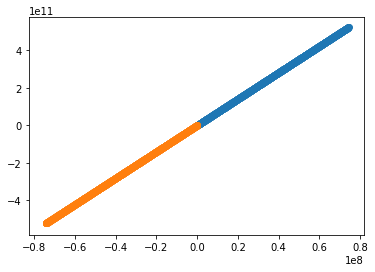

In [44]:
plt.scatter(r1[:,0],r1[:,1],cmap='Greens')
plt.scatter(r2[:,0],r2[:,1])



[3.74000000e+12 3.74000000e+12 3.74000000e+12 ... 3.74000428e+12
 3.74000428e+12 3.74000428e+12]
